# SARIMAX
https://www.kaggle.com/code/sajikim/time-series-forecasting-methods-example-python/notebook

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

warnings.simplefilter('ignore')

In [22]:
alaska = pd.read_csv(f'../data/alaska.csv')
alaska['week'] = pd.to_datetime(alaska['week'], format = '%Y-%m-%d')
alaska.set_index('week', inplace=True)
alaska.head()

,state,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
week,,,,,,,,,,,
2017-12-31,Alaska,28,46,24,37,0,0,0,0,0,0
2018-01-07,Alaska,37,45,25,65,37,0,0,0,0,0
2018-01-14,Alaska,10,46,16,53,30,0,0,0,0,0
2018-01-21,Alaska,33,41,10,35,14,0,0,0,0,0
2018-01-28,Alaska,32,24,0,40,0,0,0,0,0,0


In [23]:
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

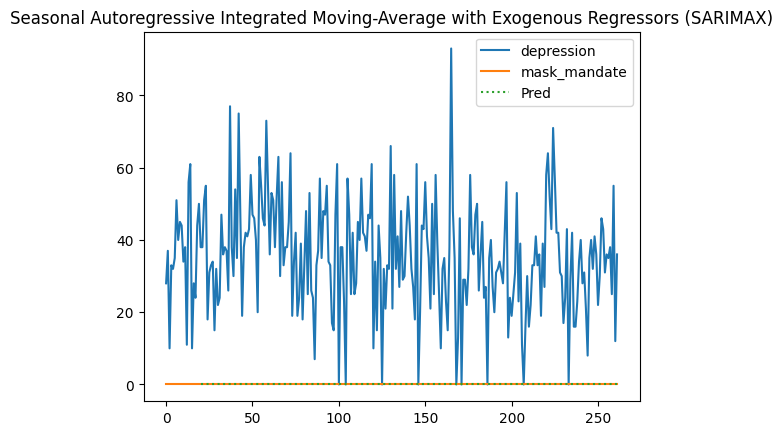

In [24]:
def SARIMAX_model(train,test):
    # fit model
    model = SARIMAX(train.drop('depression', axis=1), exog=train['mask_mandate'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, exog=test["mask_mandate"].values)
    res=pd.DataFrame({"Pred":yhat, "depression":test["depression"].values,"mask_mandate":test["mask_mandate"].values})
    return res

df_train = alaska[['depression', 'mask_mandate']][:20]
df_test = alaska[['depression', 'mask_mandate']][20:]
df_ret = SARIMAX_model(df_train, df_test)
show_graph(df_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)")

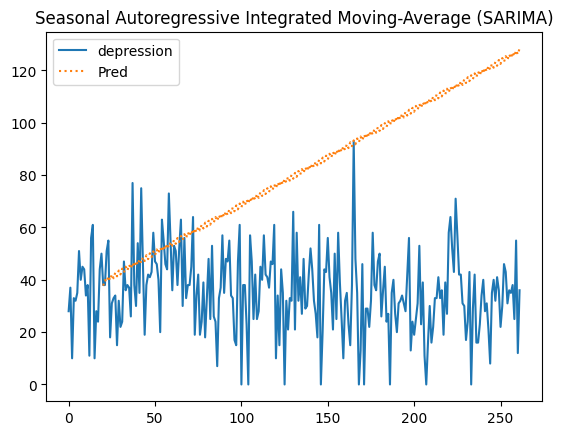

In [29]:

def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['depression'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "depression":test["depression"].values})
    return res
 
df_train = alaska[['depression']][:20]
df_test = alaska[['depression']][20:]
df_ret = SARIMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average (SARIMA)")

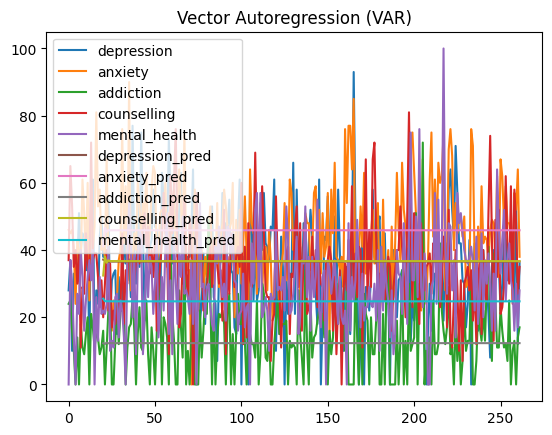

In [33]:
from statsmodels.tsa.vector_ar.var_model import VAR


def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(y=df_train.values, steps=len(test))
    res=pd.DataFrame({"depression_pred":[x[0] for x in yhat], "anxiety_pred":[x[1] for x in yhat], "addiction_pred":[x[2] for x in yhat], "counselling_pred":[x[3] for x in yhat],"mental_health_pred":[x[4] for x in yhat],
                      "depression":test["depression"].values, "anxiety":test["anxiety"].values,"addiction":test["addiction"].values, "counselling":test["counselling"].values,"mental_health":test["mental_health"].values})
    return res

df_train = alaska[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']][:20]
df_test = alaska[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']][20:]
df_ret = VAR_model(df_train, df_test)
show_graph(df_train, df_ret, "Vector Autoregression (VAR)")